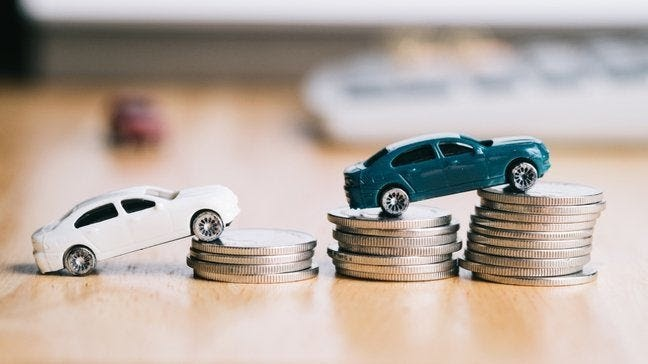

# CAR PRICE PREDICTION WITH MACHINE LEARNING

### importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_rows=500
pd.options.display.max_columns=30

In [2]:
# reading csv file
df=pd.read_csv("C:\\Users\\ayith\\OneDrive\\Documents\\data sets\\CarPrice_Assignment.csv",skipinitialspace = True)

In [3]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df.shape

(205, 26)

In [5]:
df.info()   # checking file info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
# checking null values

df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [7]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

### spliting the numerical & categiercal columns

In [8]:
num_col=df.select_dtypes(exclude='object')

In [9]:
num_col.columns

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [10]:
num_col

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.680,9.00,111,5000,21,27,13495.000
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.680,9.00,111,5000,21,27,16500.000
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.470,9.00,154,5000,19,26,16500.000
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.400,10.00,102,5500,24,30,13950.000
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.400,8.00,115,5500,18,22,17450.000
5,6,2,99.8,177.3,66.3,53.1,2507,136,3.19,3.400,8.50,110,5500,19,25,15250.000
6,7,1,105.8,192.7,71.4,55.7,2844,136,3.19,3.400,8.50,110,5500,19,25,17710.000
7,8,1,105.8,192.7,71.4,55.7,2954,136,3.19,3.400,8.50,110,5500,19,25,18920.000
8,9,1,105.8,192.7,71.4,55.9,3086,131,3.13,3.400,8.30,140,5500,17,20,23875.000
9,10,0,99.5,178.2,67.9,52.0,3053,131,3.13,3.400,7.00,160,5500,16,22,17859.167


In [11]:
# changeing the column name
df.rename(columns={"CarName":"companyname"},inplace=True)

In [12]:
cat_col=df.select_dtypes(include='object')

In [13]:
cat_col.columns

Index(['companyname', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

In [14]:
df

,car_ID,symboling,companyname,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.680,9.00,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.680,9.00,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.470,9.00,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.400,10.00,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.400,8.00,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.400,8.50,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.400,8.50,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.400,8.50,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.400,8.30,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.400,7.00,160,5500,16,22,17859.167


In [15]:
cat_col.columns

Index(['companyname', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

### replaceing the company names of cars

In [16]:
df.companyname = df.companyname.str.lower()

def replace_name(a,b):
    df.companyname.replace(a,b,inplace=True)

replace_name([ 'nissan rogue',
       'nissan latio', 'nissan titan', 'nissan leaf', 'nissan juke',
       'nissan note', 'nissan clipper', 'nissan nv200', 'nissan dayz',
       'nissan fuga', 'nissan otti', 'nissan teana', 'nissan kicks','nissan versa', 'nissan gt-r','nissan'],'Nissan')
replace_name(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero quadrifoglio'],'alfa-romero')
replace_name(['audi 100 ls', 'audi 100ls', 'audi fox',
       'audi 5000', 'audi 4000', 'audi 5000s (diesel)'],'audi')
replace_name([ 'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4',
       'bmw x4', 'bmw x5'],'BMW')
replace_name(['chevrolet impala',
       'chevrolet monte carlo', 'chevrolet vega 2300'],'chevrolet')
replace_name(['dodge rampage',
       'dodge challenger se', 'dodge d200', 'dodge monaco (sw)',
       'dodge colt hardtop', 'dodge colt (sw)', 'dodge coronet custom',
       'dodge dart custom', 'dodge coronet custom (sw)'],'Dodge')
replace_name(['honda civic',
       'honda civic cvcc', 'honda accord cvcc', 'honda accord lx',
       'honda civic 1500 gl', 'honda accord', 'honda civic 1300',
       'honda prelude', 'honda civic (auto)'],'Honda')
replace_name(['isuzu mu-x', 'isuzu d-max ', 'isuzu d-max v-cross'],'isuzu')
replace_name(['jaguar xj', 'jaguar xf', 'jaguar xk', 'maxda rx3'],'jaguar')
replace_name(['maxda glc deluxe', 'mazda rx2 coupe',
       'mazda rx-4', 'mazda glc deluxe', 'mazda 626', 'mazda glc',
       'mazda rx-7 gs', 'mazda glc 4', 'mazda glc custom l',
       'mazda glc custom'],'mazda')
replace_name(['buick electra 225 custom',
       'buick century luxus (sw)', 'buick century', 'buick skyhawk',
       'buick opel isuzu deluxe', 'buick skylark',
       'buick century special', 'buick regal sport coupe (turbo)'],'buick')
replace_name(['mitsubishi mirage', 'mitsubishi lancer', 'mitsubishi outlander',
       'mitsubishi g4', 'mitsubishi mirage g4', 'mitsubishi montero',
       'mitsubishi pajero'],'mitsubishi')
replace_name(['peugeot 504', 'peugeot 304',
       'peugeot 504 (sw)', 'peugeot 604sl', 'peugeot 505s turbo diesel'],'peugeot')
replace_name(['plymouth fury iii',
       'plymouth cricket', 'plymouth satellite custom (sw)',
       'plymouth fury gran sedan', 'plymouth valiant', 'plymouth duster'],'plymouth')
replace_name(['porsche macan',
       'porcshce panamera', 'porsche cayenne', 'porsche boxter'],'porcshce')
replace_name(['renault 12tl', 'renault 5 gtl'],'renault')
replace_name(['saab 99e', 'saab 99le', 'saab 99gle'],'saab')
replace_name(['subaru', 'subaru dl', 'subaru brz',
       'subaru baja', 'subaru r1', 'subaru r2', 'subaru trezia',
       'subaru tribeca'],'subaru')
replace_name(['toyota corona mark ii',
       'toyota corona', 'toyota corolla 1200', 'toyota corona hardtop',
       'toyota corolla 1600 (sw)', 'toyota carina', 'toyota mark ii',
       'toyota corolla', 'toyota corolla liftback',
       'toyota celica gt liftback', 'toyota corolla tercel',
       'toyota corona liftback', 'toyota starlet', 'toyota tercel',
       'toyota cressida', 'toyota celica gt', 'toyouta tercel'],'toyota')
replace_name(['vokswagen rabbit',
       'volkswagen 1131 deluxe sedan', 'volkswagen model 111',
       'volkswagen type 3', 'volkswagen 411 (sw)',
       'volkswagen super beetle', 'volkswagen dasher', 'vw dasher',
       'vw rabbit', 'volkswagen rabbit', 'volkswagen rabbit custom'],'volkswagen')
replace_name([ 'volvo 145e (sw)', 'volvo 144ea', 'volvo 244dl', 'volvo 245',
       'volvo 264gl', 'volvo diesel', 'volvo 246'],'volvo')
df.companyname.unique()

array(['alfa-romero', 'audi', 'BMW', 'chevrolet', 'Dodge', 'Honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury cougar',
       'mitsubishi', 'Nissan', 'peugeot', 'plymouth', 'porcshce',
       'renault', 'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'],
      dtype=object)

### finding the unique values of each column

In [17]:
df['fueltype'].unique()

array(['gas', 'diesel'], dtype=object)

In [18]:
df['aspiration'].unique()

array(['std', 'turbo'], dtype=object)

In [19]:
cat_col.columns

Index(['companyname', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

In [20]:
df['doornumber'].unique()

array(['two', 'four'], dtype=object)

In [21]:
df2=pd.unique(df[[ 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem']].values.ravel('k'))

In [22]:
df2

array(['gas', 'diesel', 'std', 'turbo', 'two', 'four', 'convertible',
       'hatchback', 'sedan', 'wagon', 'hardtop', 'rwd', 'fwd', '4wd',
       'front', 'rear', 'dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf',
       'dohcv', 'six', 'five', 'three', 'twelve', 'eight', 'mpfi', '2bbl',
       'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'], dtype=object)

In [23]:
num_col.columns

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

### checking the car prices

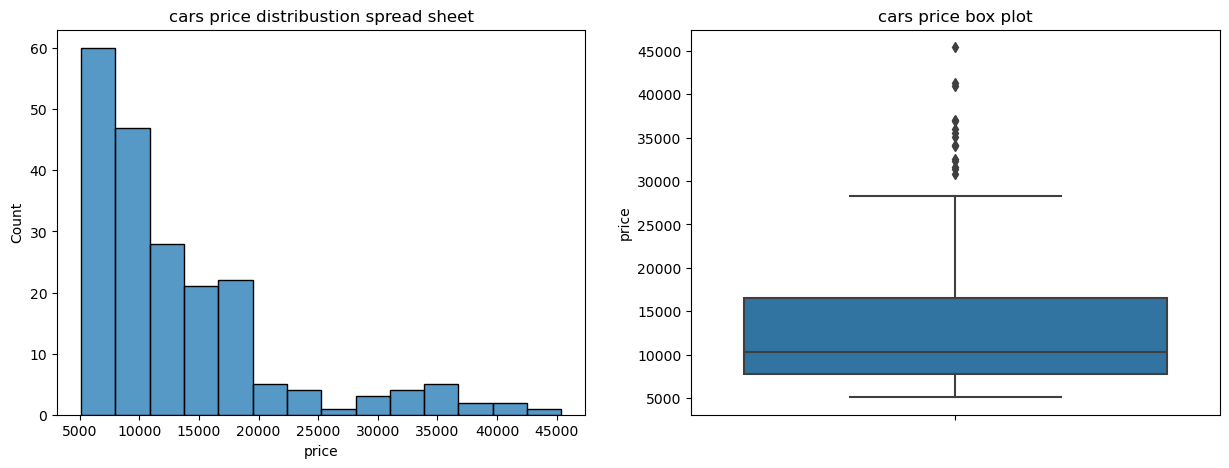

In [24]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('cars price distribustion spread sheet')
sns.histplot(df.price)

plt.subplot(1,2,2)
plt.title('cars price box plot')
sns.boxplot(y=df.price)

plt.show()

In [25]:
print(df.price.describe(percentiles=[0.25,0.5,0.85,0.75,0.9,1]))

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
90%      22563.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64


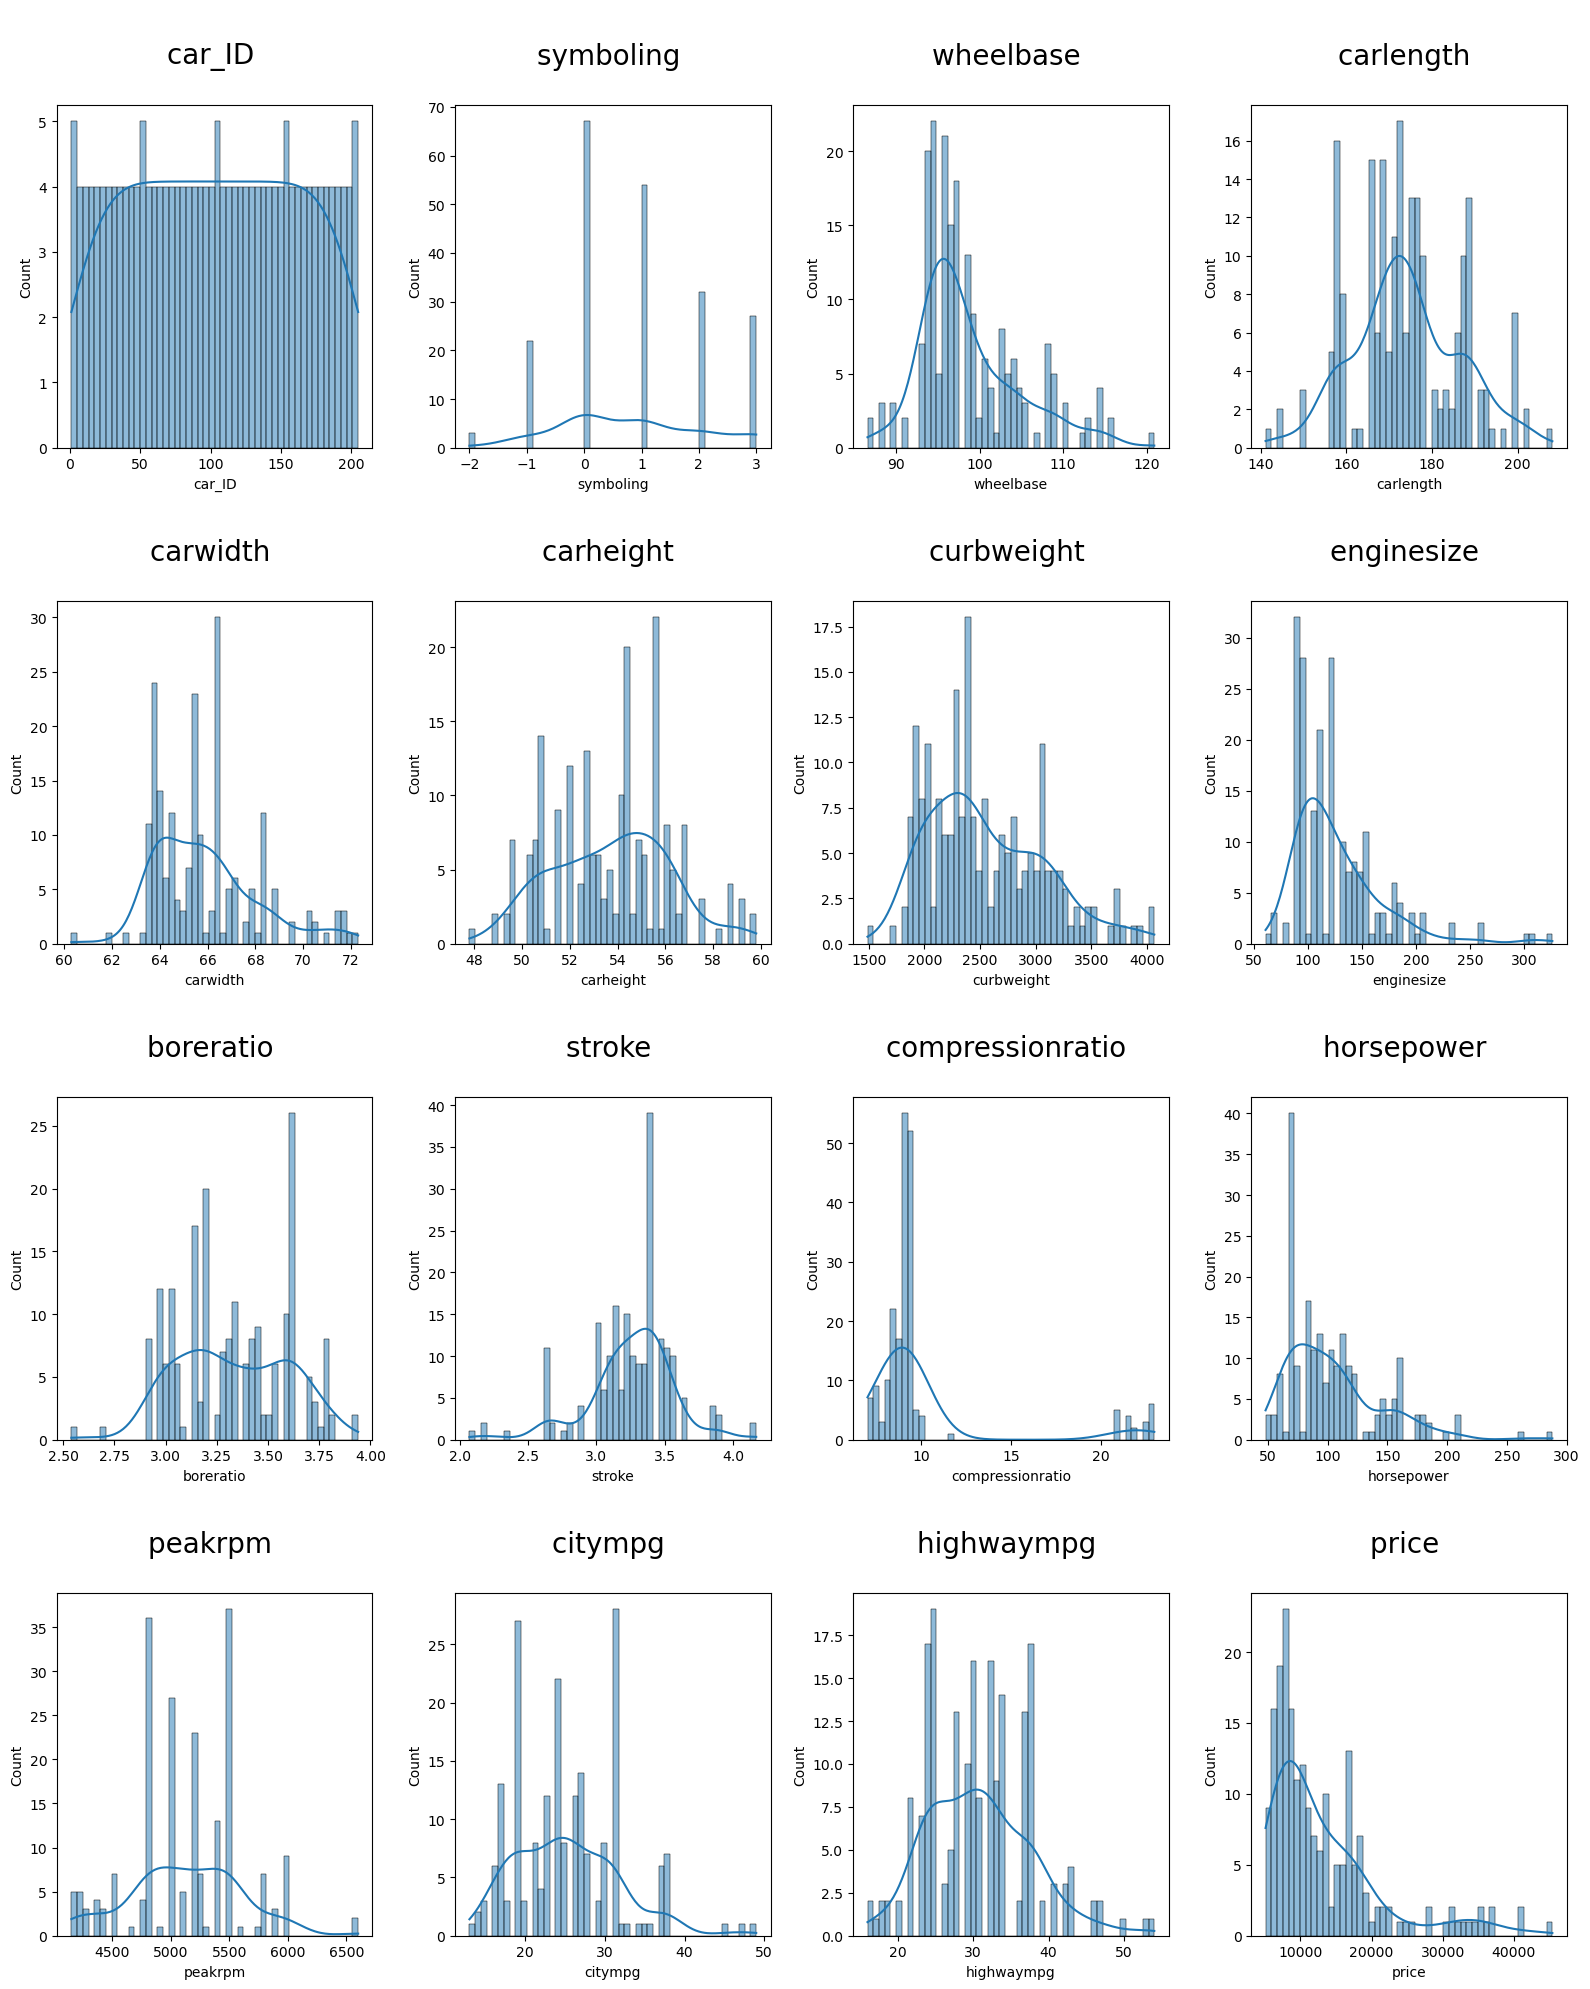

In [26]:
cols = num_col.columns

plt.figure(figsize = (16, 20))
plotnumber = 1

for i in range(len(cols)):
    if plotnumber <= 16:
        ax = plt.subplot(4, 4, plotnumber)
        sns.histplot(x = cols[i], data = df, ax = ax, palette='rocket', kde = True, bins = 50)
        plt.title(f"\n{cols[i]} \n", fontsize = 20)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

### checking the outliers of columns

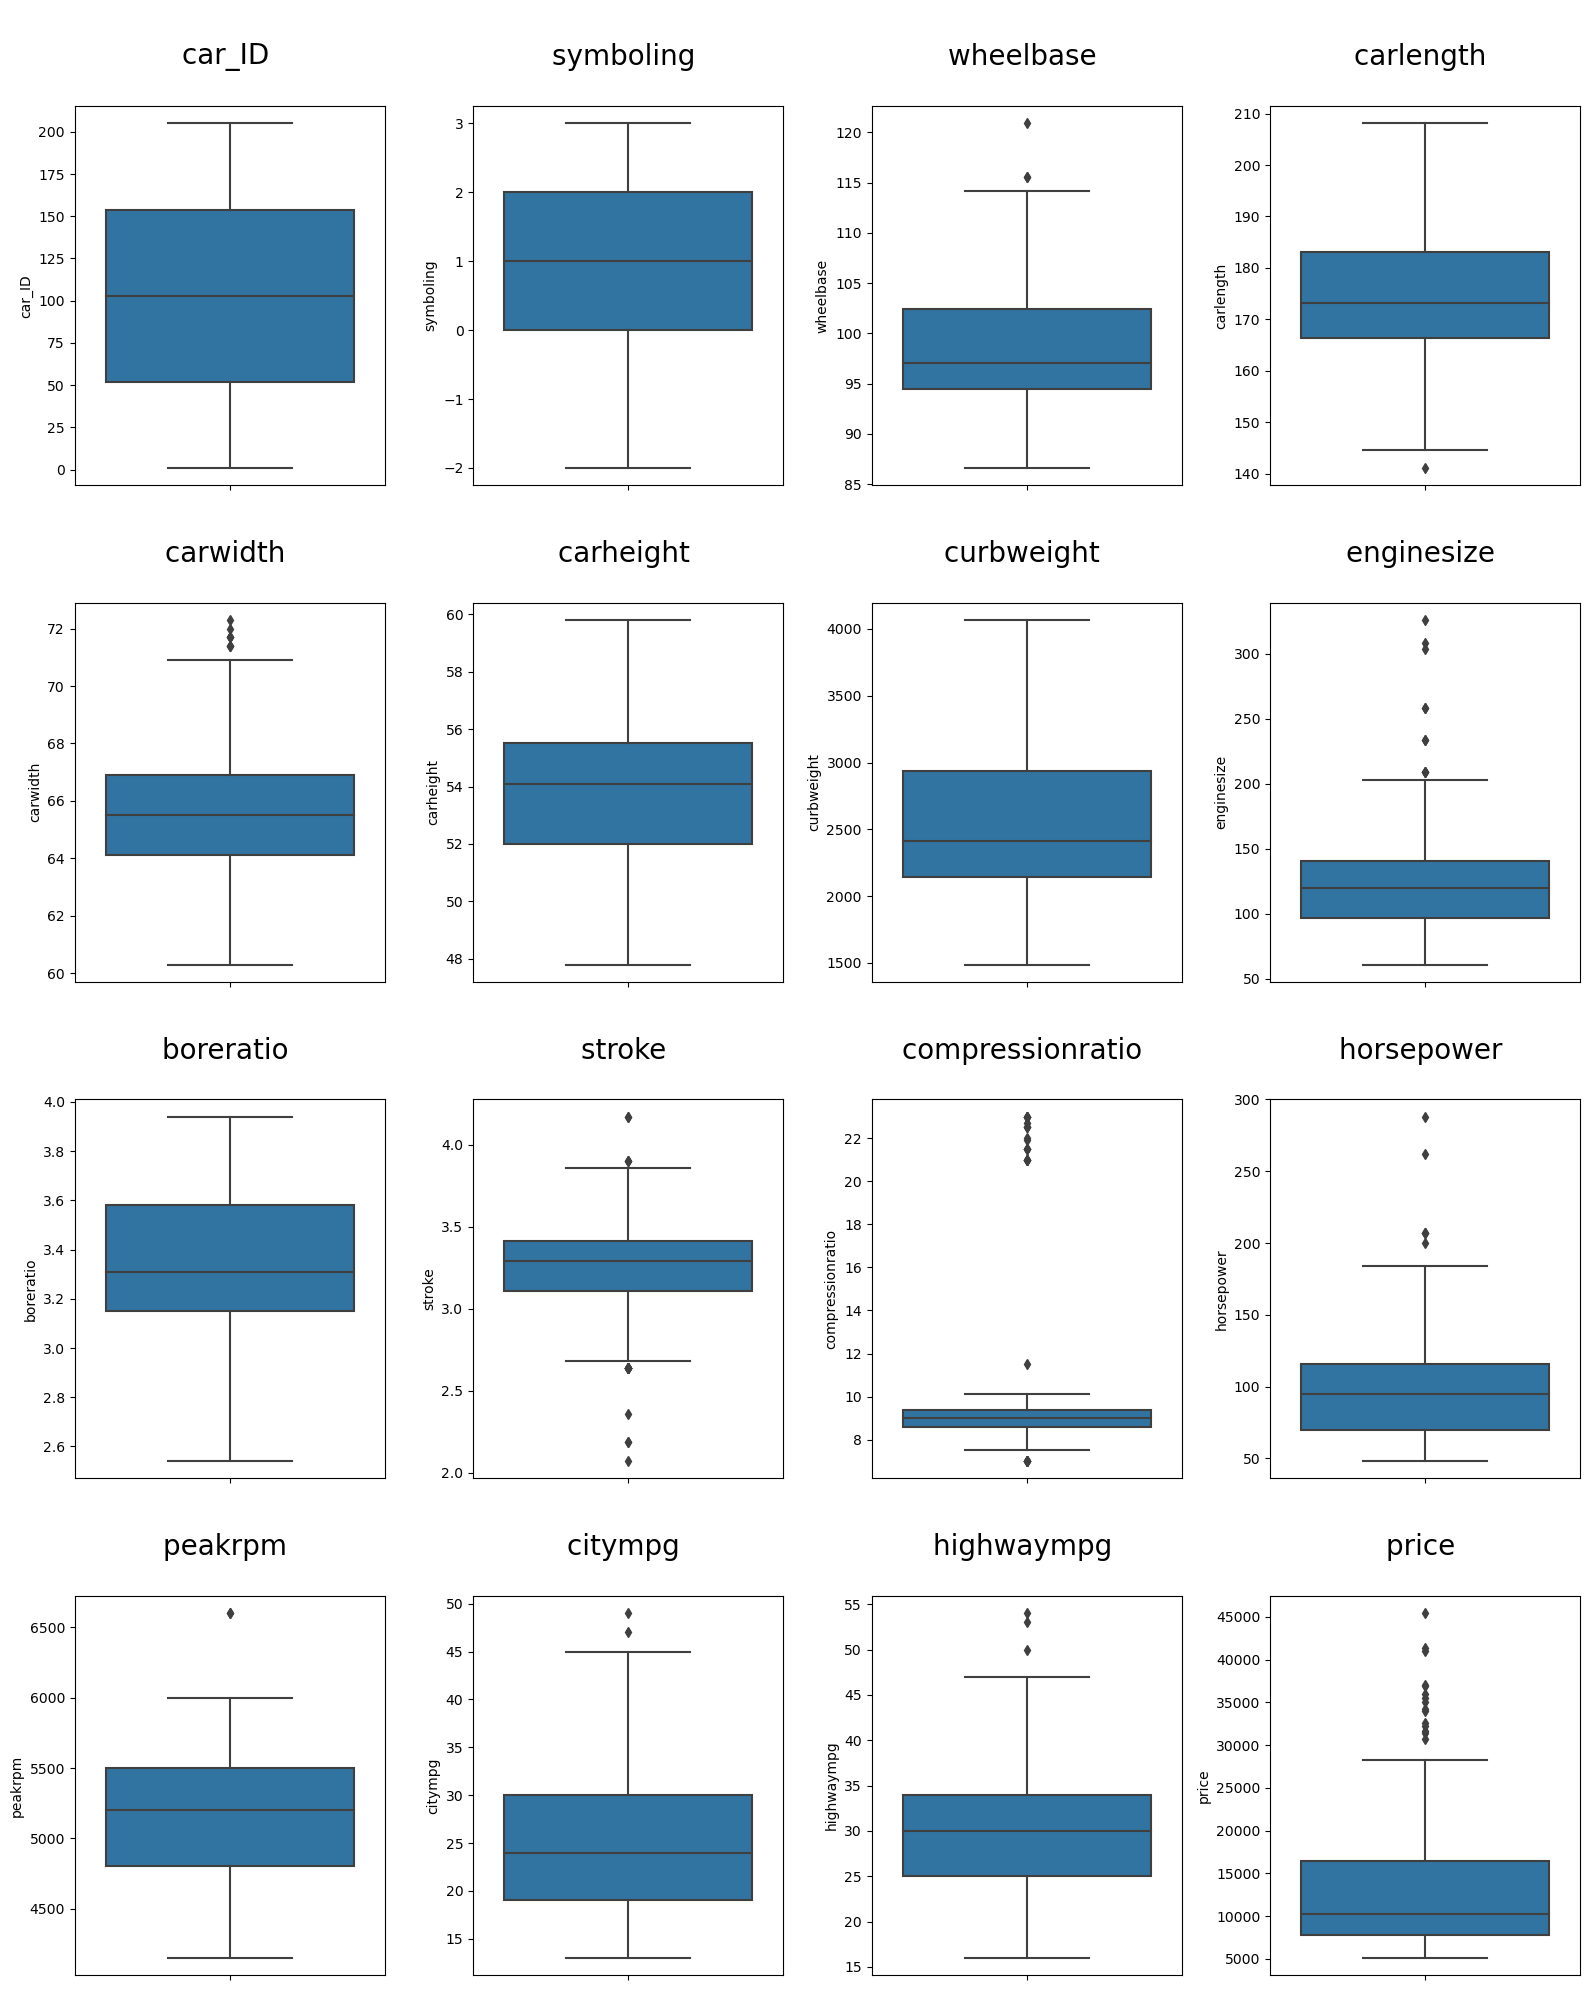

In [27]:

cols = num_col.columns

plt.figure(figsize = (16, 20))
plotnumber = 1

for i in range(len(cols)):
    if plotnumber <= 16:
        ax = plt.subplot(4, 4, plotnumber)
        sns.boxplot(y = cols[i], data = df, ax = ax)
        plt.title(f"\n{cols[i]} \n", fontsize = 20)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

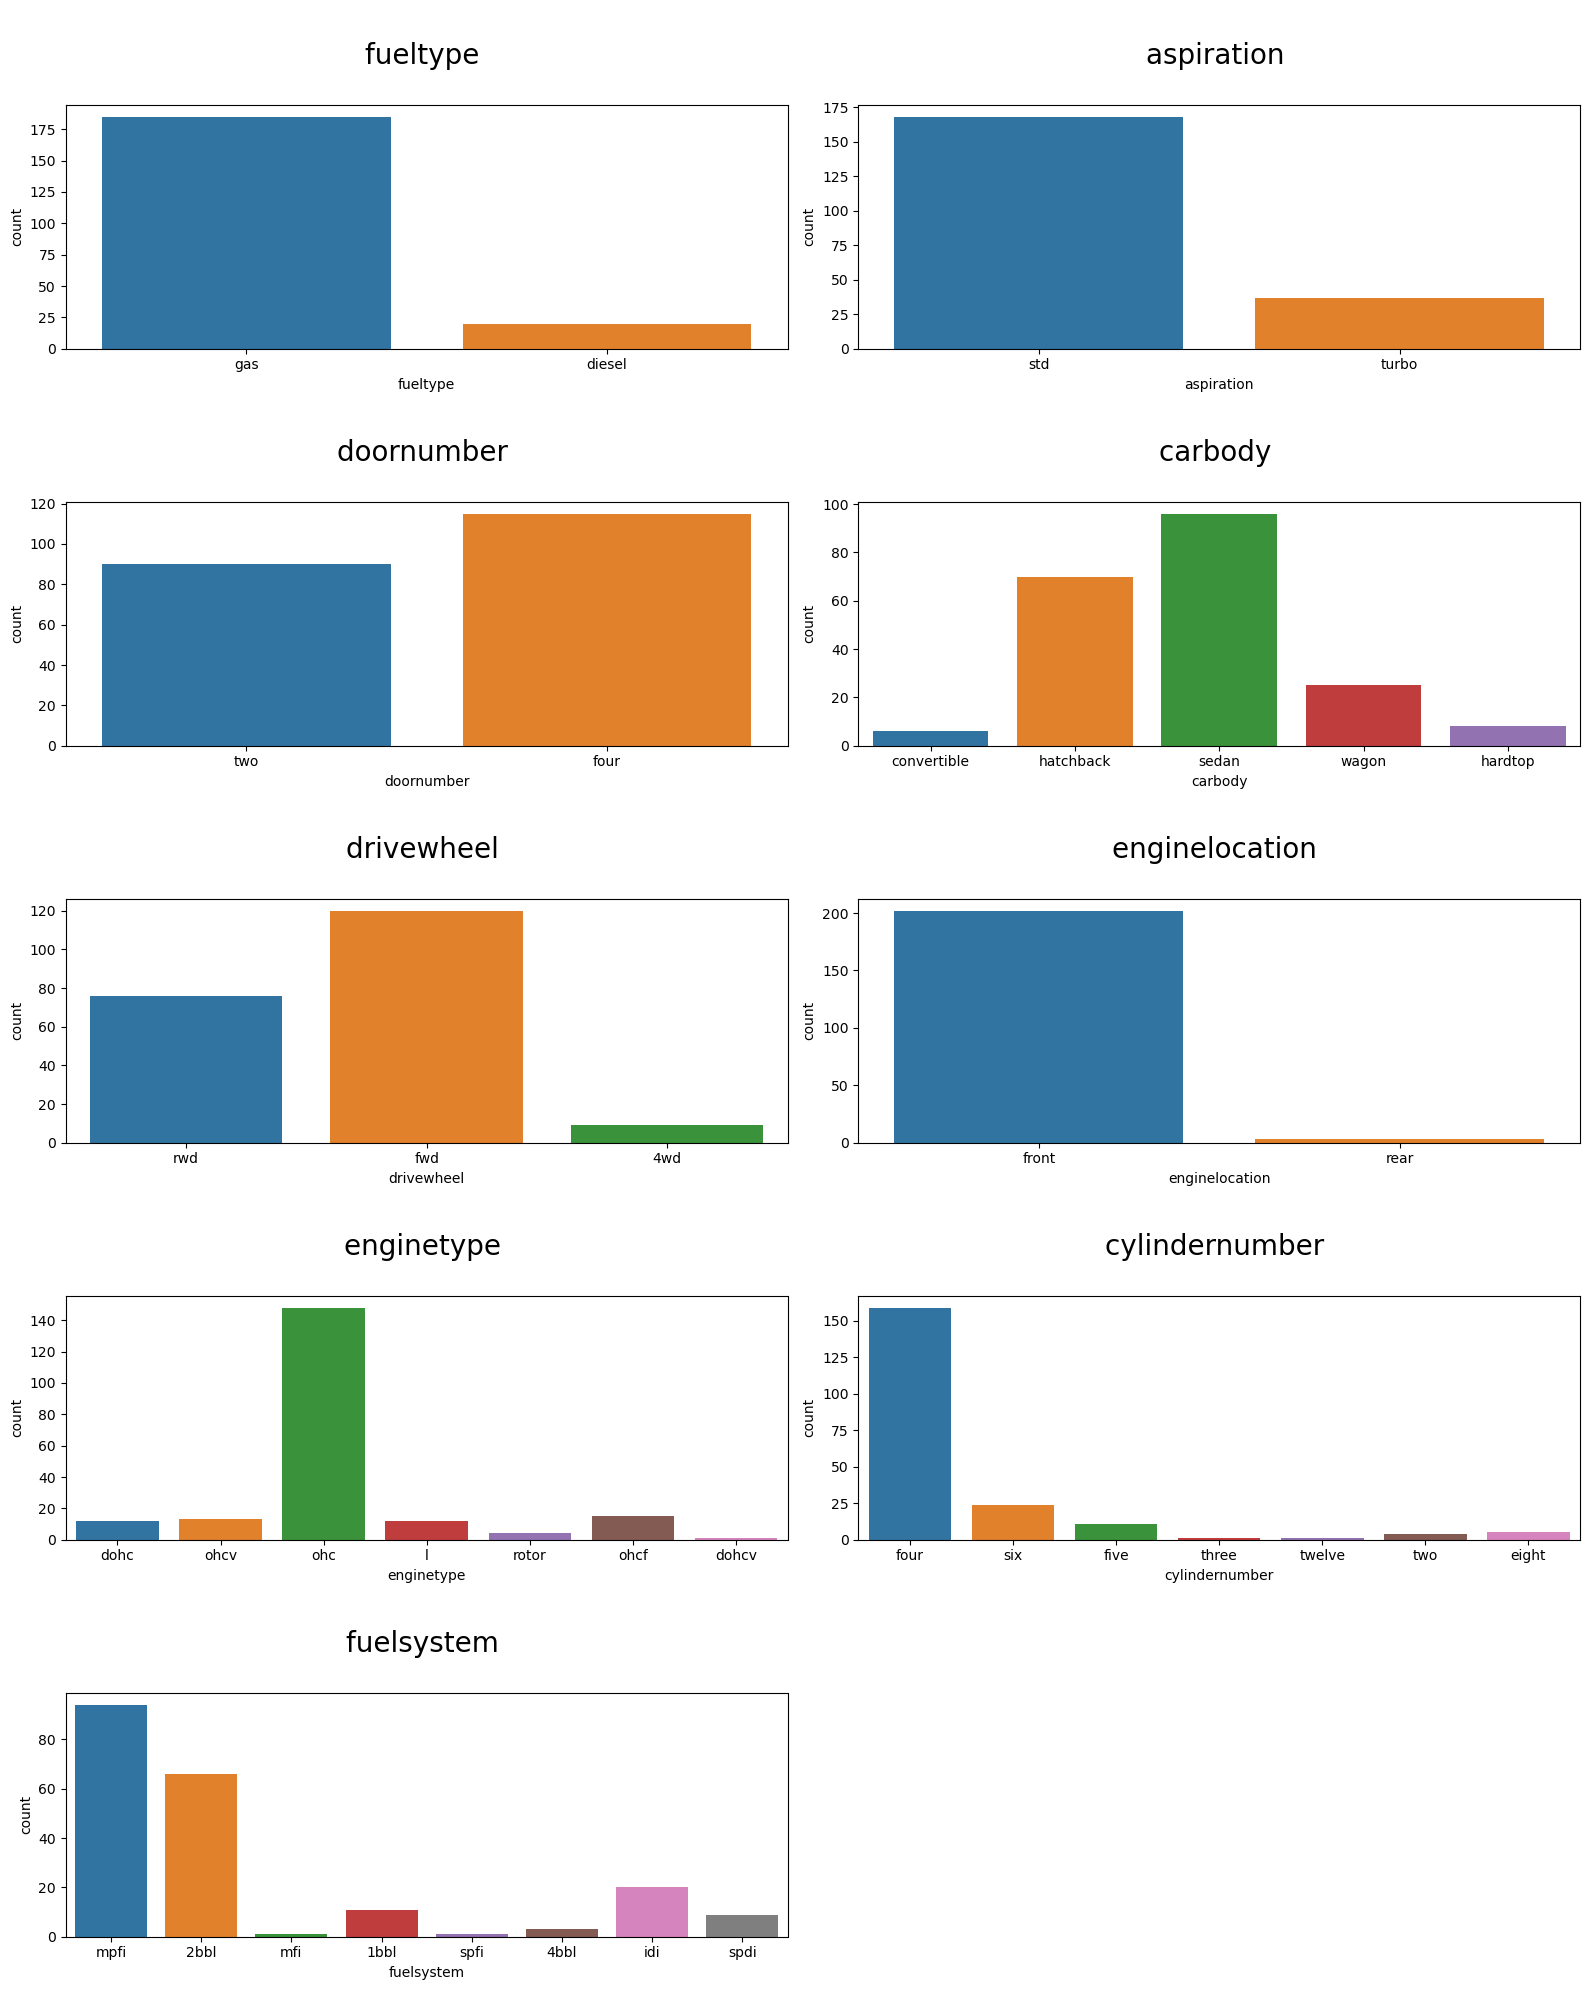

In [28]:
cols = cat_col.columns

plt.figure(figsize = (16, 20))
plotnumber = 1

for i in range(1, len(cols)):
    if plotnumber <= 10:
        ax = plt.subplot(5, 2, plotnumber)
        sns.countplot(x = cols[i], data = df, ax = ax)
        plt.title(f"\n{cols[i]} \n", fontsize = 20)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

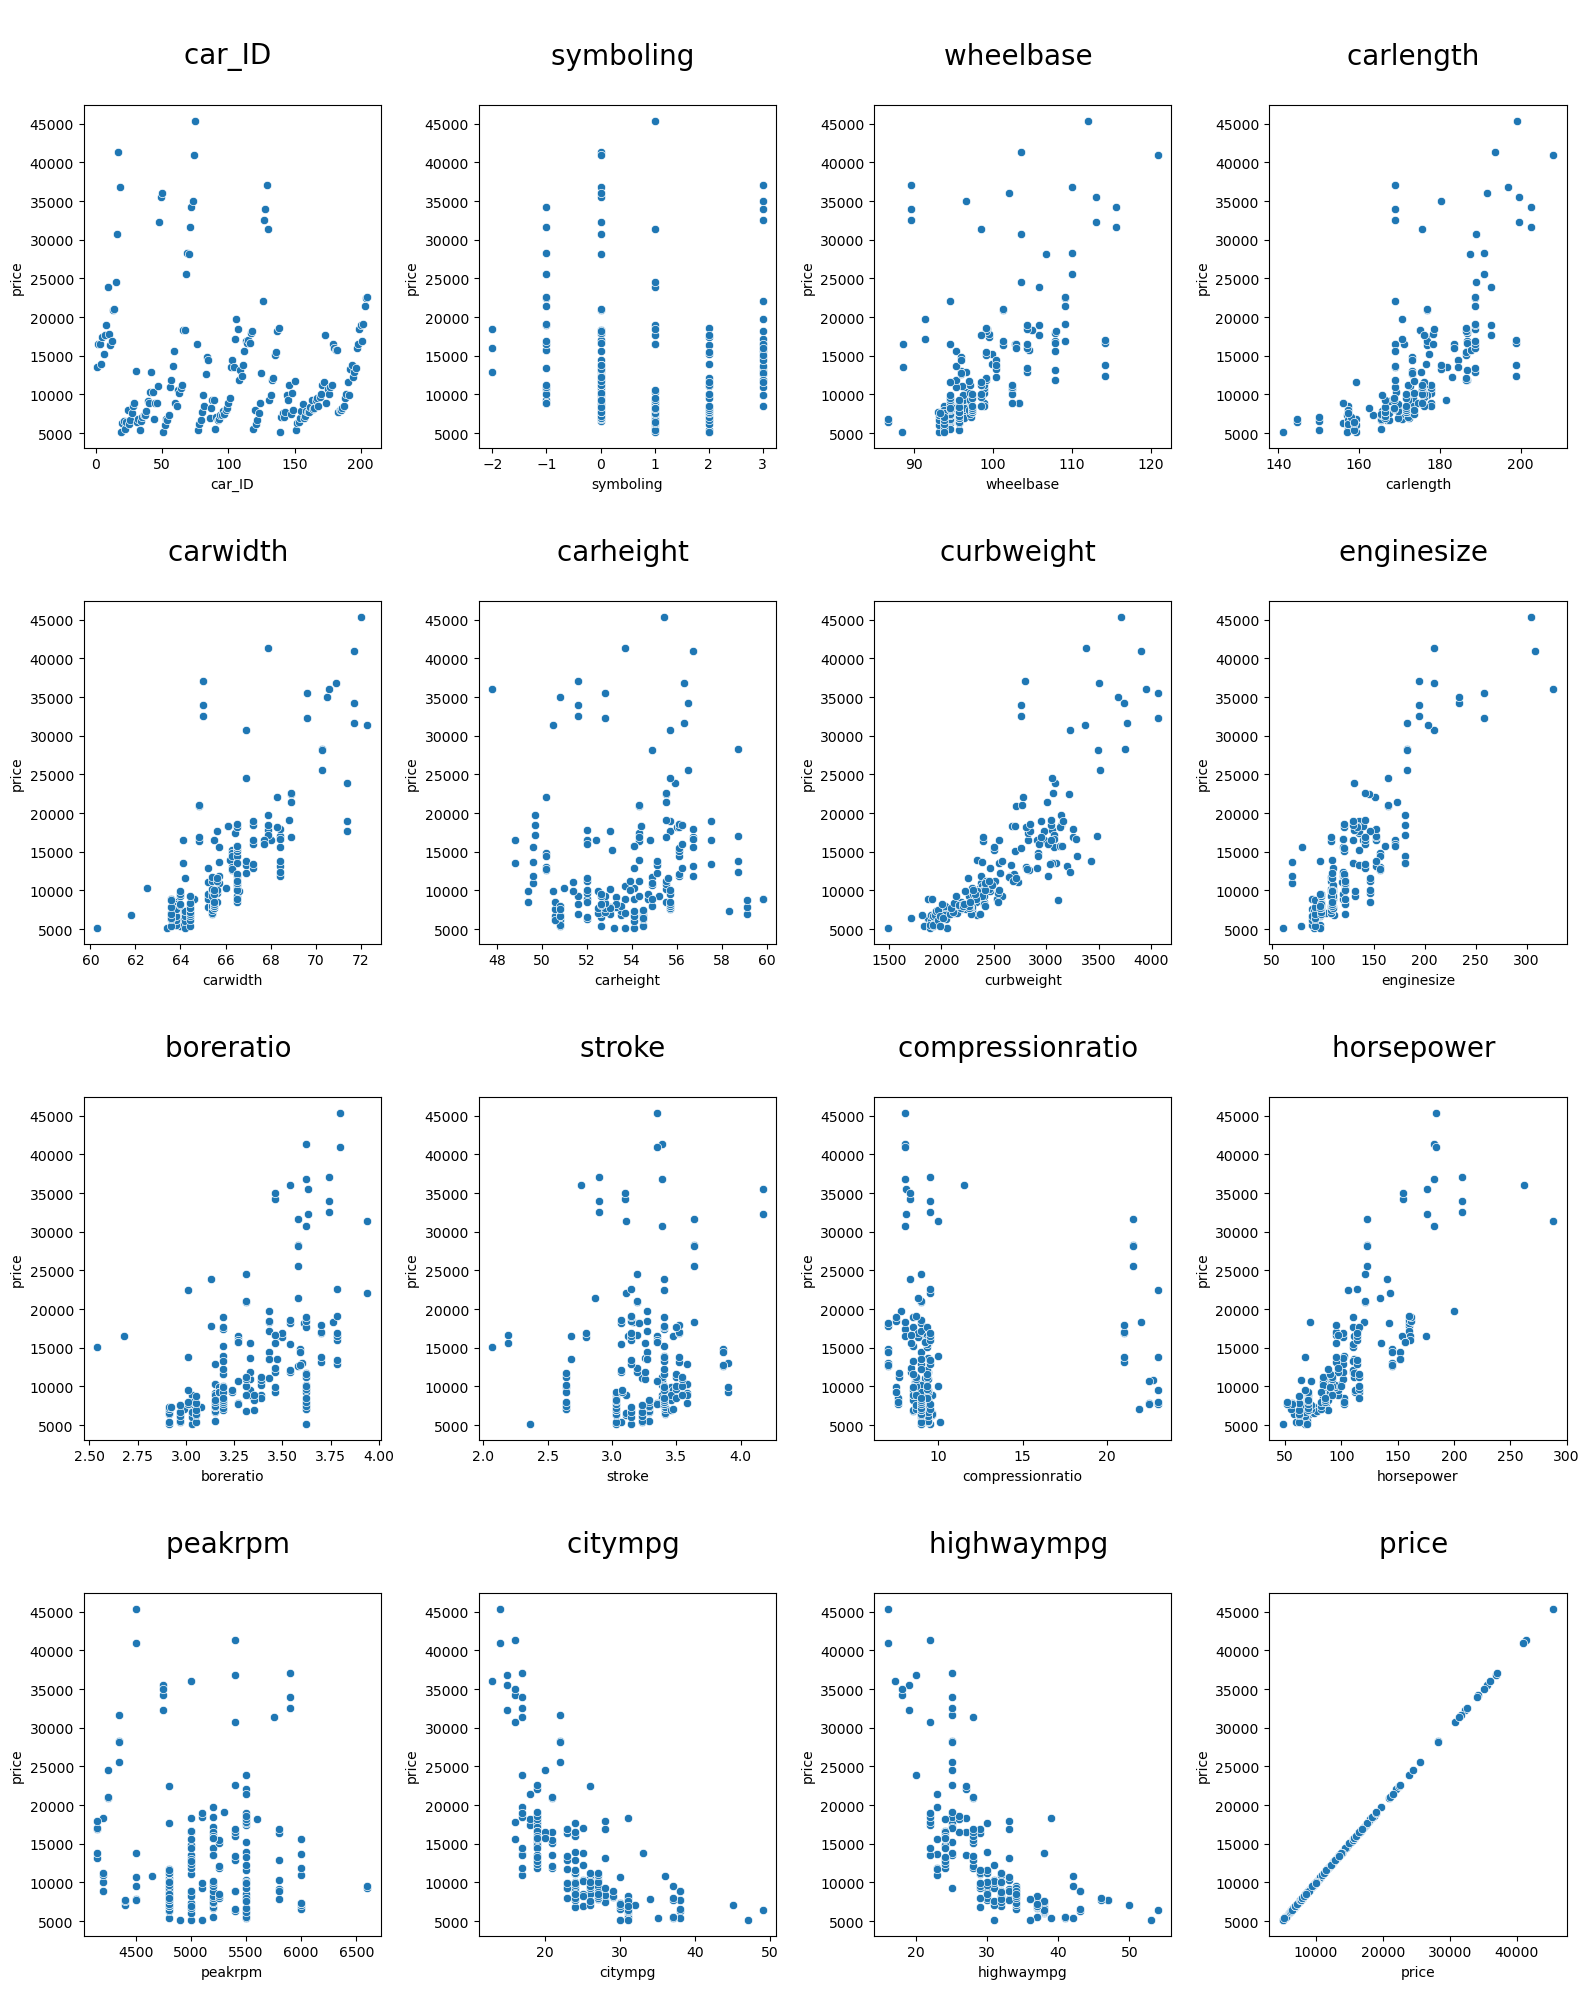

In [29]:
#Bivariate and Multivariate Analysis
cols = num_col.columns

plt.figure(figsize = (16, 20))
plotnumber = 1

# plotting the countplot of each categorical column.

for i in range(len(cols)):
    if plotnumber <= 16:
        ax = plt.subplot(4, 4, plotnumber)
        sns.scatterplot(x = cols[i], y = df['price'], data = df, ax = ax, palette='rocket')
        plt.title(f"\n{cols[i]} \n", fontsize = 20)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

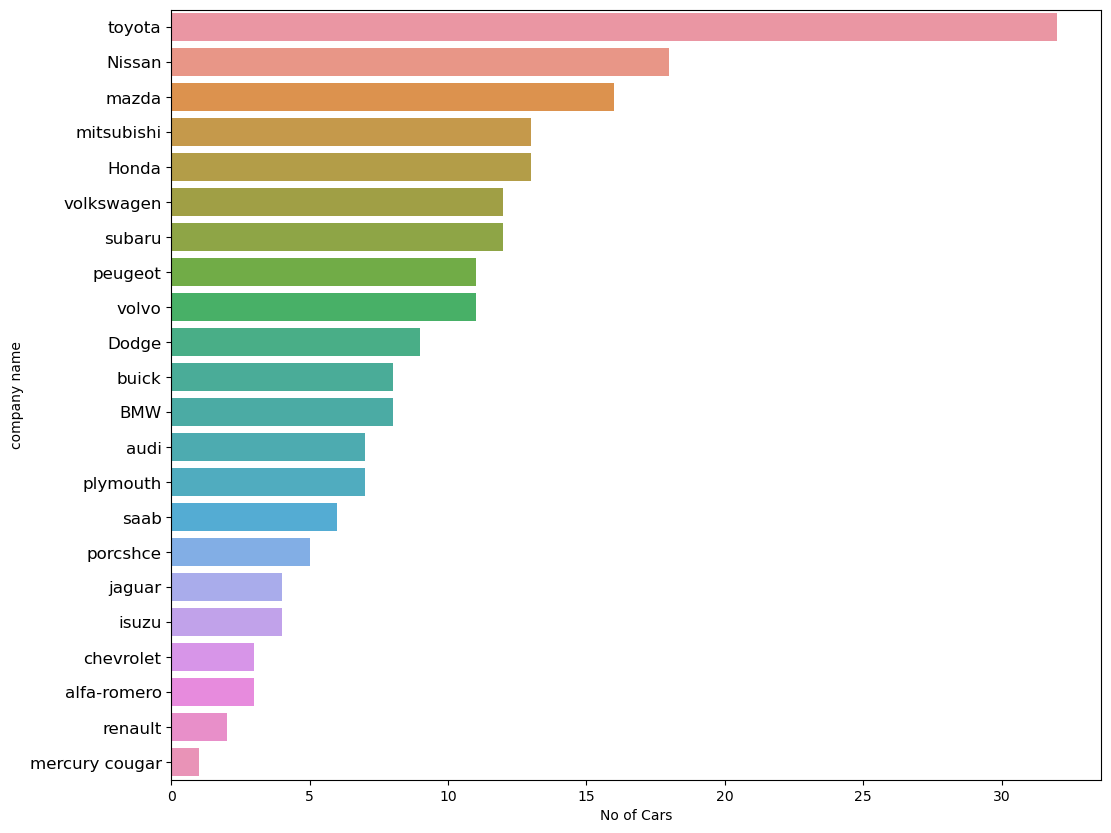

In [30]:
df1 = pd.DataFrame(df['companyname'].value_counts().reset_index())
df1.columns = ['company name', 'No of Cars']

plt.figure(figsize = (12, 10))
sns.barplot(x = 'No of Cars', y = 'company name', data = df1)
plt.yticks(size = 12)
plt.show()

<Figure size 2500x600 with 0 Axes>

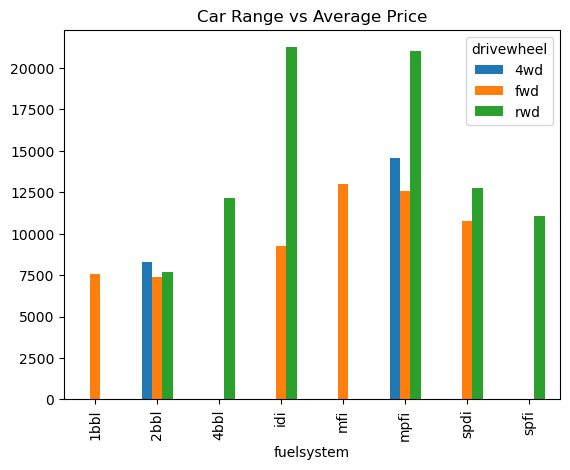

In [31]:
plt.figure(figsize=(25, 6))

df1 = pd.DataFrame(df.groupby(['fuelsystem','drivewheel'])['price'].mean().unstack(fill_value=0))
df1.plot.bar()
plt.title('Car Range vs Average Price')
plt.show()

In [32]:
# Defining the map function
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df
# Applying the function to the cars_lr

cars_lr = dummies('fueltype',df)
cars_lr = dummies('aspiration',df)
cars_lr = dummies('carbody',df)
cars_lr = dummies('drivewheel',df)
cars_lr = dummies('enginetype',df)
cars_lr = dummies('cylindernumber',df)


In [33]:
df['cylindernumber'].value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64

In [34]:
# creating features and label variable

X = df.drop(columns = 'price', axis = 1)
y = df['price']

In [35]:
X = pd.get_dummies(X, drop_first = True)
X

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,...,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.680,9.00,111,5000,21,27,...,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.680,9.00,111,5000,21,27,...,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.470,9.00,154,5000,19,26,...,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.400,10.00,102,5500,24,30,...,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.400,8.00,115,5500,18,22,...,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,6,2,99.8,177.3,66.3,53.1,2507,136,3.19,3.400,8.50,110,5500,19,25,...,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
6,7,1,105.8,192.7,71.4,55.7,2844,136,3.19,3.400,8.50,110,5500,19,25,...,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
7,8,1,105.8,192.7,71.4,55.7,2954,136,3.19,3.400,8.50,110,5500,19,25,...,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
8,9,1,105.8,192.7,71.4,55.9,3086,131,3.13,3.400,8.30,140,5500,17,20,...,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
9,10,0,99.5,178.2,67.9,52.0,3053,131,3.13,3.400,7.00,160,5500,16,22,...,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [36]:
# checking for multicollinearity using `VIF` and `correlation matrix`

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif['VIF'] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
vif['Features'] = X.columns

vif

C:\Users\ayith\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF,Features
0,5.361348e+02,car_ID
1,6.794082e+00,symboling
2,1.906423e+01,wheelbase
3,2.389053e+01,carlength
4,1.621246e+01,carwidth
5,7.377879e+00,carheight
6,4.564945e+01,curbweight
7,6.652621e+01,enginesize
8,1.465711e+01,boreratio
9,6.150801e+00,stroke


In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [39]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','carlength','carwidth','price']
df[num_vars] = scaler.fit_transform(df[num_vars])

In [40]:
X_train.shape,X_test.shape,y_train.shape, y_test.shape

((143, 65), (62, 65), (143,), (62,))

In [41]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
sc_X=StandardScaler()

In [44]:
xtrain = sc_X.fit_transform(X_train)

In [45]:
xtest = sc_X.fit_transform(X_test)

In [46]:
from sklearn import linear_model
from sklearn import svm
classifiers = [
    svm.SVR(),
    linear_model.SGDRegressor(),
    linear_model.BayesianRidge(),
    linear_model.LassoLars(),
    linear_model.ARDRegression(),
    linear_model.PassiveAggressiveRegressor(),
    linear_model.TheilSenRegressor(),
    linear_model.LinearRegression()]
for item in classifiers:
    print(item)
    clf = item
    clf.fit(X_train,y_train)
    print(clf.predict(X_test),'\n')

SVR()
[10238.12276056 10260.3675765  10257.04914872 10252.80697331
 10247.83027535 10252.30709027 10237.82093074 10243.0421458
 10258.87572884 10240.32069379 10257.81419195 10258.75219862
 10258.6491851  10253.64122035 10249.8864627  10250.9352058
 10249.9143013  10258.50721112 10242.54048827 10236.34548367
 10248.54212947 10260.89091875 10246.94492443 10251.23455215
 10258.86710926 10243.49461286 10238.29193753 10260.86964611
 10237.79535727 10237.58744636 10246.75804201 10250.25092673
 10256.01630166 10248.40297226 10237.80680512 10263.97459931
 10246.48594743 10257.0731738  10240.2871778  10260.3483104
 10249.80709623 10258.21869406 10263.09304853 10254.77274982
 10250.90913386 10241.34731372 10241.21319864 10252.86536054
 10251.60289828 10247.18733764 10259.57521899 10246.21887302
 10242.03955144 10243.15839881 10258.07314152 10260.04456723
 10249.65723971 10263.28100703 10247.79513392 10240.57649894
 10243.30930862 10256.50528322] 

SGDRegressor()
[ 5968.36548447 18481.95117689 12

C:\Users\ayith\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
C:\Users\ayith\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:652: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 42 iterations, i.e. alpha=6.926e+00, with an active set of 32 regressors, and the smallest chol

[ 6523.80155117 19030.85411948 13032.98595322  3332.58529093
 10595.75849457 11864.96921829  5527.5799481   5898.46550252
 17579.67945023  7555.50900546 22062.30689455 36344.77511296
 12677.43190641 12807.88218867  4981.00096629 12590.71125965
 10072.28795002 17375.57211574  9980.97301753  5594.19969584
 10129.97988434 17818.84534184 10464.52312329 13280.14015837
 20591.11090612  6885.74125379  6735.97279124 18075.29979144
  6724.91076162  6216.47432933 10082.6342482  11691.44139274
 24932.55350818  9259.46105247  6373.16037332 29935.82258108
  9445.47673537 14674.11316465  5186.02147693 37386.09442329
  4844.98894371 14515.24988015 35799.54998234 17577.26261912
 12623.32874593  7360.01341467  5698.55375848 13999.52702227
 12184.542439   10315.62116139 20359.30311525  6157.15618025
  7655.37187789 11017.42014316 20734.91278065 18261.04876214
 11199.20421429 17817.02949177 10511.38792985  5552.29649221
  5155.93262214 14318.12677951] 

PassiveAggressiveRegressor()
[ 6404.45242848 19111.

In [47]:
y_predict=clf.predict(X_test)

In [48]:
y_predict

array([  6491.33013063,  16517.51546265,  13871.62658698, -22335.91047974,
         9077.71912522,  11379.62856787,   5731.4533077 ,   3982.10940929,
        16536.45671656,   8359.76633075,  20690.87402857,  37434.70962928,
        12553.12739777,  15853.2478588 ,   7038.81595548,  10202.65327457,
        30497.19303664,  18312.51556015,   8268.44285146,   7272.42813068,
         8876.58359759,  16347.56964018,  31439.16549892,  11709.18691969,
        18048.9782788 ,   6930.87381963,   6640.27375018,  17148.64257305,
         7154.93586799,   5025.87584299,   8285.06170759,  11913.41113717,
        37695.8583478 ,   9492.18059157,   6675.38007648,  30010.03932916,
        14316.34723004,  14879.58722212,   4658.13156823,  37650.96440879,
         5887.11755297,  15437.36409643,  33112.28396095,  28122.03077554,
        11036.38055303,   8787.60583286,   7201.73549831,  13042.90944121,
        10805.01826805,  10067.7306153 ,  20606.77026338,   8077.16199632,
         7588.41881322,  

In [49]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [50]:
lr.score(X_train, y_train)

0.9783548097431701

In [59]:
lr.score(X_test, y_predict)

1.0

In [52]:
from sklearn.linear_model import Lasso, LassoCV

In [53]:
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 10000, normalize = True)
lassocv.fit(X_train, y_train)

C:\Users\ayith\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


LassoCV(cv=10, max_iter=10000, normalize=True)

In [54]:
lasso = Lasso(alpha = lassocv.alpha_)
lasso.fit(X_train, y_train)

C:\Users\ayith\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.261e+07, tolerance: 8.925e+05
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.5743416905388534)

In [55]:
lasso.score(X_train, y_train)

0.9774145188740271

In [56]:
lasso.score(X_test, y_test)

0.7185672985278083

In [61]:
#y_test=y_test.flatten()
predict = clf.predict(X_test)
compar = pd.DataFrame({'actual':y_test, 'predicted': predict})
compar = compar.reset_index(drop = True)
compar[:10]

,actual,predicted
0,6795.0,6491.330131
1,15750.0,16517.515463
2,15250.0,13871.626587
3,5151.0,-22335.910480
4,9995.0,9077.719125
5,11199.0,11379.628568
6,5389.0,5731.453308
7,7898.0,3982.109409
8,17199.0,16536.456717
9,6529.0,8359.766331
